In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe_cython as lb

We now want to visualize the evolution of the flow...let's see how it goes...

In [6]:
from IPython import display

It's probably easier to specify dt and dr and the dimensions. Then get everything else from that...yeah. That way the velocity is on the scale of U ~ 0.1 or so.

In [7]:
#### Input to the simulation in SI. ######
diameter = 1. # meters
length = 4. # meters

deltaP = -0.01

dr = 0.01
dt = .01

viscosity = 10.**-3. # More viscous = easier to simulate!

##### Derived parameters ######
print 'Desired viscosity:' , viscosity
#Re = (input_velocity * diameter)/viscosity
#print 'Desired Re', Re

# Re is set by diameter, input_velocity, and viscosity
# Adjust dr so that mach number doers not explode!
print
print '###### Simulation Parameters #########'
print

# Solve for the desired omega...make sure it's in the correct range.


ly = int(np.ceil(diameter/dr))
lx = int(np.ceil(length/dr))
print 'ly', ly
print 'lx', lx

omega = .5 + (3*dt*viscosity)/(dr**2)

print 'omega:' , omega

assert (omega > 0.5) and (omega < 1)

sim = lb.Pipe_Flow(lx=lx, ly=ly, dr=dr, dt=dt, omega=omega,
                  deltaP = deltaP)

# U should be on the order of 0.1, 0.2 in the simulation!
#print 'u_max in simulation:' , np.max(sim.u)

Desired viscosity: 0.001

###### Simulation Parameters #########

ly 100
lx 400
omega: 0.8


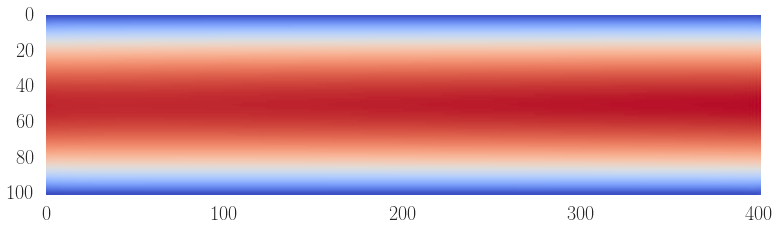

In [8]:
total_num_steps = 5000
steps_per_image= 200

num_to_record = int(np.ceil(float(total_num_steps)/steps_per_image))

Re_list = []
Ma_list = []

plt.figure()
for i in range(num_to_record):
    sim.update_dimensionless_nums()
    Re_list.append(sim.Re)
    Ma_list.append(sim.Ma)
    print 'max non_dim u:', np.max(sim.u)
    print 'sum of mass' , np.sum(sim.rho)/(sim.nx*sim.ny)
    mag = np.sqrt(sim.u**2 + sim.v**2)
    plt.imshow(mag.T, cmap = cm.coolwarm)
    plt.grid(False)
    #plt.clim(vmin=0, vmax=1.)
    #if i == 0:
    #    plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    sim.run(steps_per_image)
plt.clf() # This way a second figure does not appear at the end...

In [9]:
deltaP_div_rho = (sim.dr**2/sim.dt**2)*deltaP

In [10]:
deltaP_div_rho

-0.01

In [30]:
dp_dx = deltaP_div_rho/length
r = np.arange(sim.ny)*sim.dr - diameter/2
R = diameter/2.

prediction = (1./(7.2*viscosity))*dp_dx*(r**2-R**2)

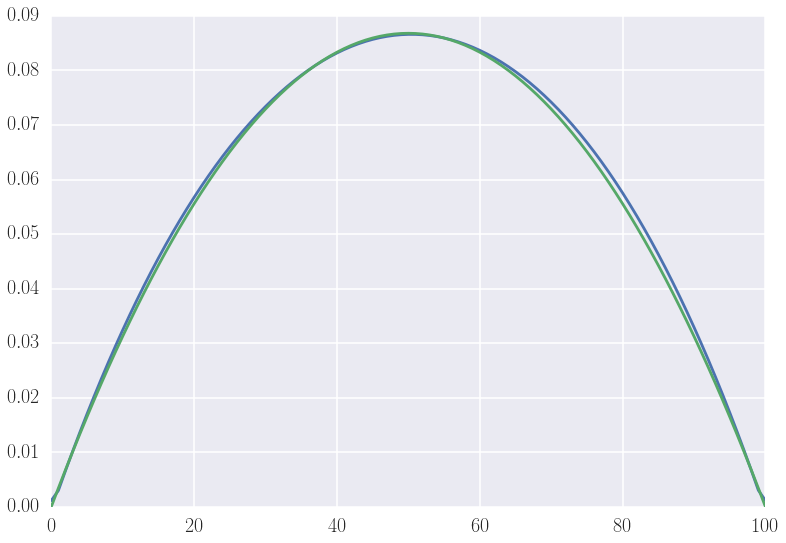

In [31]:
plt.plot((sim.dr/sim.dt)*sim.u[50, :])
plt.plot(prediction)

IDK how to convert...but let's just fit.

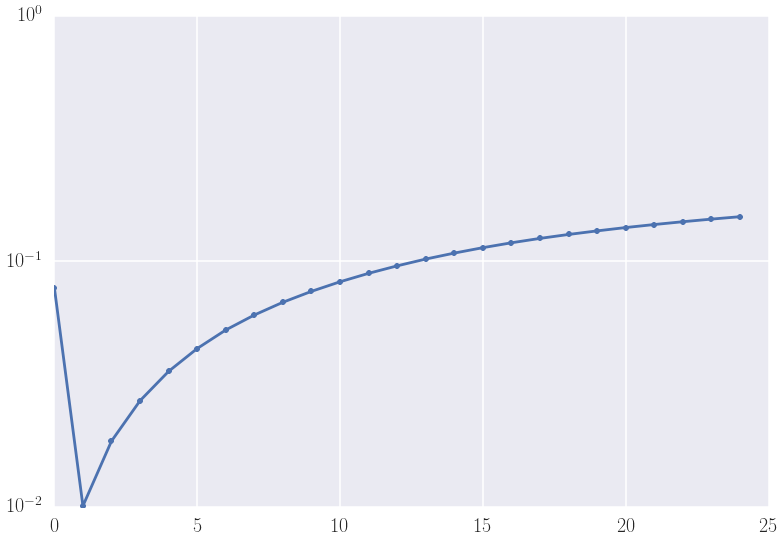

In [32]:
plt.semilogy(Ma_list, ls='-', marker='.')

Nope, it's fucked! lol.

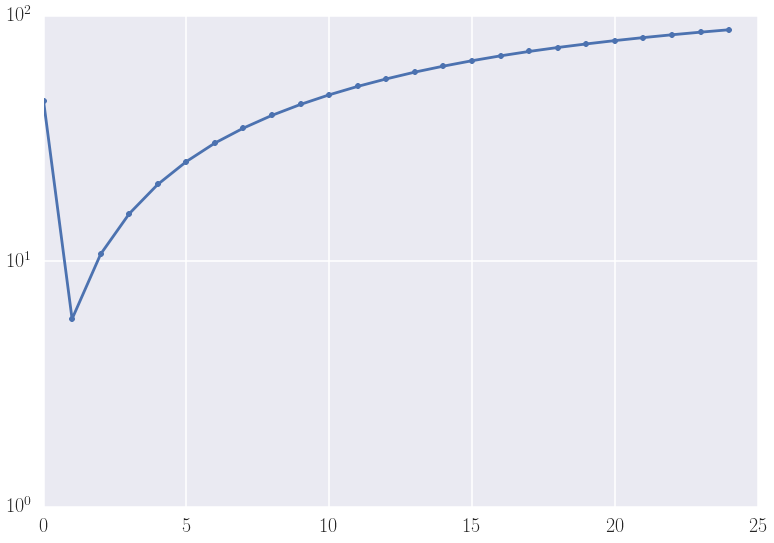

In [33]:
plt.semilogy(Re_list, ls='-', marker='.')

Looks like it still hasn't converged. But, as expected, larger pressure differences leads to larger reynolds numbers!